https://stepik.org/lesson/58180/step/1

### I/O and working with pixels

In [1]:
import numpy as np
from skimage import img_as_float, img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow, imsave

In [2]:
img = imread("https://stepik.org/media/attachments/lesson/58180/tiger-color.png")

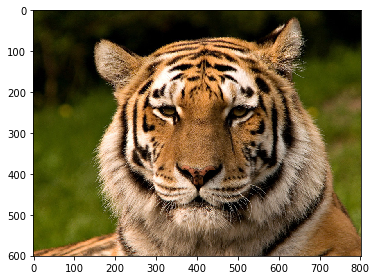

In [3]:
imshow(img)

In [4]:
img.shape

(601, 801, 3)

In [5]:
img.shape[1]

801

In [6]:
img[383, 374]

array([204, 117,  79], dtype=uint8)

In [7]:
img[383, 374, 2]

79

In [8]:
img[383, 374] = [255, 255, 0]

In [9]:
imsave("tiger-yellow-nose.png", img)

task: https://stepik.org/lesson/58180/step/4

In [10]:
task_img = imread("https://stepik.org/media/attachments/lesson/58180/img.png")
task_img.shape[1]

419

task: https://stepik.org/lesson/58180/step/5

In [11]:
task_img = imread("https://stepik.org/media/attachments/lesson/58180/tiger-color.png")
task_img[task_img.shape[0] // 2, task_img.shape[1] // 2] = [102, 204, 102]
imsave("out_img.png", task_img)

In [12]:
img = imread("https://stepik.org/media/attachments/lesson/58180/tiger-color.png")

In [13]:
nose = img[370:410, 350:440]

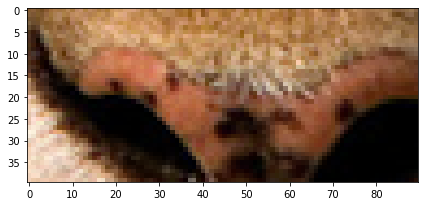

In [14]:
imshow(nose)

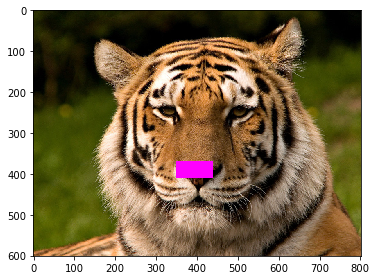

In [15]:
img[370:410, 350:440] = [255, 0, 255]
imshow(img)

In [16]:
img_yellow = imread("tiger-yellow-nose.png")

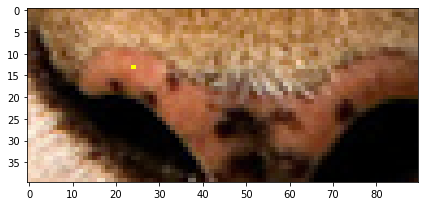

In [17]:
imshow(img_yellow[370:410, 350:440])

In [18]:
img_assigned = img_yellow

In [19]:
img_copy = img_yellow.copy()

In [20]:
img_yellow[370:410, 350:440] = [255, 0, 255]

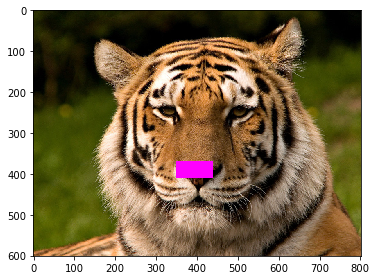

In [21]:
imshow(img_yellow)

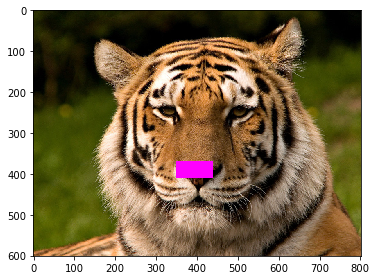

In [22]:
imshow(img_assigned)

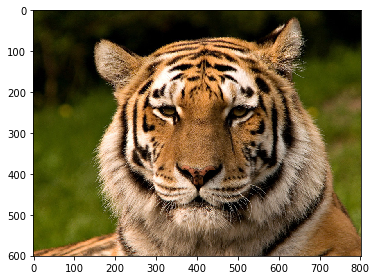

In [23]:
imshow(img_copy)

task: https://stepik.org/lesson/58180/step/7

In [24]:
task_img = imread("https://stepik.org/media/attachments/lesson/58180/tiger-gray.png")
x = task_img.shape[0] // 2
y = task_img.shape[1] // 2
task_img[x-3:x+4, y-7:y+8] = [255, 192, 203]
imsave("out_img.png", task_img)

task: https://stepik.org/lesson/58180/step/8

In [25]:
task_img = imread("https://stepik.org/media/attachments/lesson/58180/tiger-border.png")
border_color = task_img[0, 0]
border_pixels = (task_img == border_color).all(axis=2)
left, right = map(np.sum, np.array_split(border_pixels.all(axis=0), 2))
up, down = map(np.sum, np.array_split(border_pixels.all(axis=1), 2))
print(left, up, right, down)

1 39 25 7


### Arithmetic operations, channels, brightness

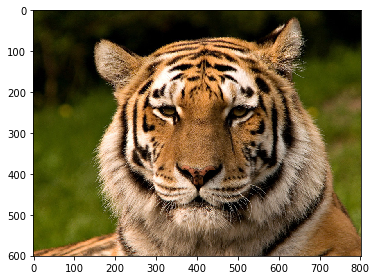

In [26]:
img = imread("https://stepik.org/media/attachments/lesson/58180/tiger-color.png")
imshow(img)

In [27]:
img.dtype

dtype('uint8')

In [28]:
img_f = img_as_float(img)

In [29]:
img.min(), img.max()

(0, 255)

In [30]:
img_f.min(), img_f.max()

(0.0, 1.0)

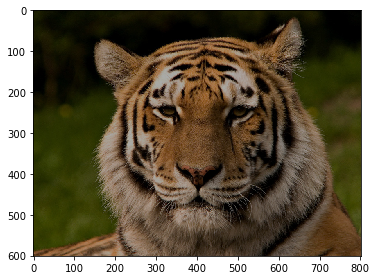

In [31]:
imshow(img_f / 1.5)

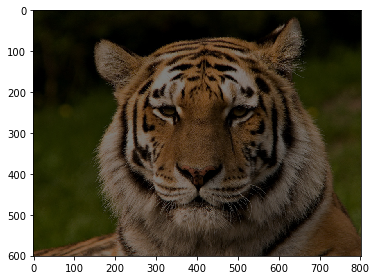

In [32]:
imshow(img_f / 2)

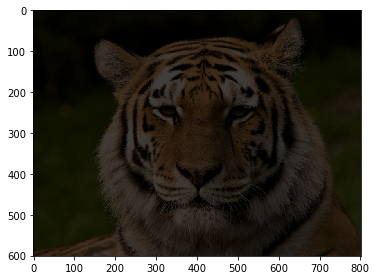

In [33]:
imshow(img_f / 4)

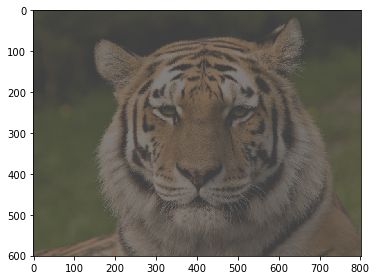

In [34]:
imshow(img_f / 4 + 0.25)

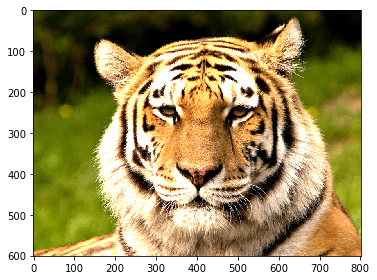

In [35]:
imshow(np.clip(img_f * 1.5, 0, 1))

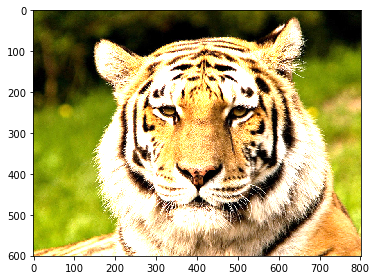

In [36]:
imshow(np.clip(img_f * 2, 0, 1))

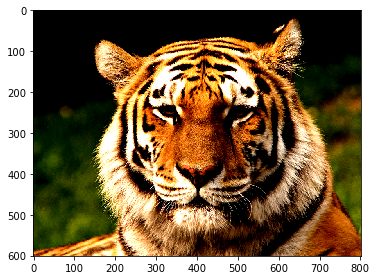

In [37]:
imshow(np.clip(img_f * 2 - 0.5, 0, 1))

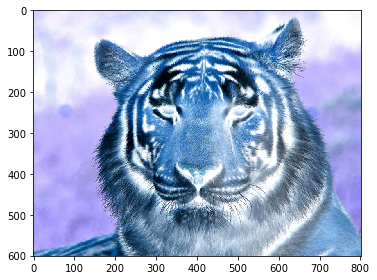

In [38]:
imshow(255 - img)

task: https://stepik.org/lesson/58181/step/2

In [39]:
task_img = imread("https://stepik.org/media/attachments/lesson/58181/tiger-color.png")
imsave("out_img.png", 255 - task_img)

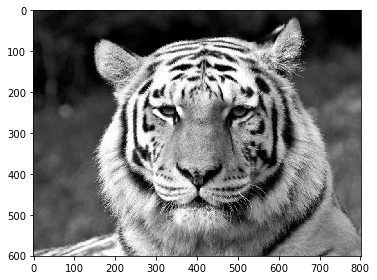

In [40]:
r = img_f[:, :, 0]
imshow(r)

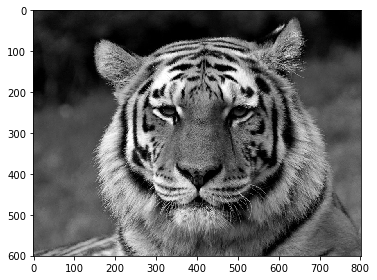

In [41]:
g = img_f[:, :, 1]
imshow(g)

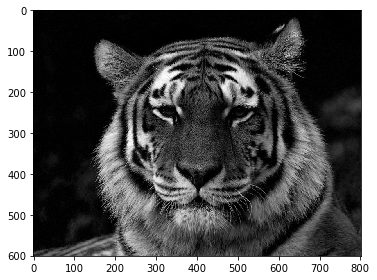

In [42]:
b = img_f[:, :, 2]
imshow(b)

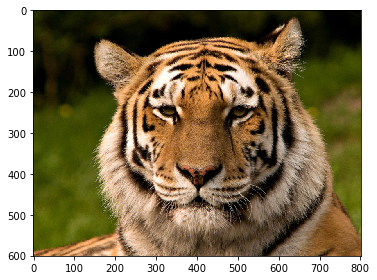

In [43]:
img_combined = np.dstack((r, g, b))
imshow(img_combined)

In [44]:
avg_gray = (r + g + b) / 3

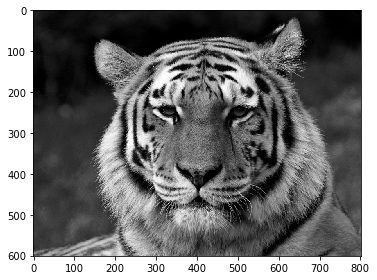

In [45]:
imshow(avg_gray)

task: https://stepik.org/lesson/58181/step/4

In [46]:
task_img = imread("https://stepik.org/media/attachments/lesson/58181/tiger-color.png")
r, g, b = map(lambda x: task_img[:, :, x], (0, 1, 2))
imsave("out_img.png", np.dstack((b, r, g)))

Averaging brightness: $Y=0.3333 \cdot R + 0.3333 \cdot G + 0.3334 \cdot B$  
Relative brightness: $Y=0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$

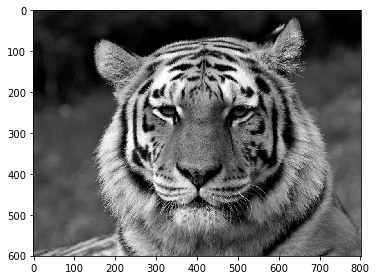

In [47]:
imshow(rgb2gray(img))

task: https://stepik.org/lesson/58181/step/6

In [48]:
def img_to_gray(input_img):
    r, g, b = map(lambda x: input_img[:, :, x], (0, 1, 2))
    return img_as_ubyte(0.2126 * r + 0.7152 * g + 0.0722 * b)

task_img = img_as_float(imread("https://stepik.org/media/attachments/lesson/58181/tiger-color.png"))
imsave("out_img.png", img_to_gray(task_img))

### Comparison of Prokudin-Gorsky's photos

task: https://stepik.org/lesson/58182/step/2

Plan:  
1. Load scan of film (our image)
2. Cast integer values to float
3. Split image into 3 equal parts (along vertical axis), trim edges
4. Shift blue channel, superimpose on green, compute similarity
5. Shift red channel, superimpose on green, compute similarity
6. Combine three channels with best shifts

In [49]:
img = imread("https://stepik.org/media/attachments/lesson/58182/00.png")

In [50]:
def trim_img(img, ph=0.02, pw=0.02):
    h, w = img.shape
    h_slice = slice(int(ph * h), int(1 + h * (1 - ph)))  # trim along vertical axis
    w_slice = slice(int(pw * w), int(1 + w * (1 - pw)))  # trim along horizontal axis
    return img[h_slice, w_slice]


def impose(ref, img, d=15):
    h_shift, w_shift = 0, 0
    max_correlation = 0.0
    for h in range(-d, d + 1):
        hrolled_img = np.roll(img, h, axis=0)
        for w in range(-d, d + 1):
            rolled_img = np.roll(hrolled_img, w, axis=1)
            correlation = (rolled_img * ref).sum()
            if correlation > max_correlation:
                max_correlation = correlation
                h_shift, w_shift = h, w    
    return np.array((h_shift, w_shift))


def align(img, g_coord):  
    img = img_as_float(img)  # cast to float
    trimg = trim_img(img)  # trim white border    
    b, g, r = np.vsplit(trimg[: 3 * (trimg.shape[0] // 3)], 3)  # split image into 3 parts
    r, g, b = map(lambda img: trim_img(img, ph=0.05, pw=0.05), (r, g, b))  # trim black border
    g_coord = np.array(g_coord)
    b_coord = g_coord - impose(g, b)  # still coordinate in g
    r_coord = g_coord - impose(g, r)  # still coordinate in g
    h_shift = int(0.32 * img.shape[0])  # vertical shift
    b_coord[0] -= h_shift
    r_coord[0] += h_shift
    return tuple(b_coord), tuple(r_coord)

In [51]:
align(img, (508, 237))

((153, 236), (857, 238))

In [52]:
def shift_img(img, h_shift, w_shift):
    img = np.roll(img, h_shift, axis=0)
    return np.roll(img, w_shift, axis=1)

def make_colored(img):
    img = img_as_float(img)  # cast to float
    trimg = trim_img(img)  # trim white border    
    b, g, r = np.vsplit(trimg[: 3 * (trimg.shape[0] // 3)], 3)  # split image into 3 parts
    r, g, b = map(lambda img: trim_img(img, ph=0.05, pw=0.05), (r, g, b))  # trim black border
    b_shift = impose(g, b)
    r_shift = impose(g, r)
    pad_value = max(b_shift.max(), r_shift.max())
    r, g, b = map(lambda img: np.pad(img, pad_value), (r, g, b))
    b = shift_img(b, *b_shift)
    r = shift_img(r, *r_shift)
    cimg = np.dstack((r, g, b))
    return cimg[pad_value:cimg.shape[0]-pad_value, pad_value:cimg.shape[1]-pad_value]

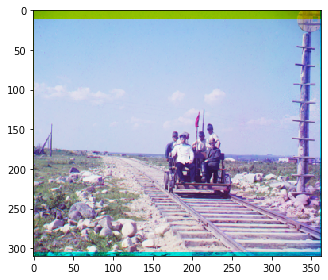

In [53]:
cimg = img_as_ubyte(make_colored(img))
imshow(cimg)

In [54]:
imsave("cimg.png", cimg)